# Simple Processing

## Goals:

  - Handle gathered data with dict() and zip()
  -  Find data relation with scipy
  - Get essential information like standard deviation $\sigma$ and distributions $\delta$
  - Linear correlation: what's that, when can help
  - Plotting

## modules:
  - numpy, scipy, scipy.stats.stats, collections, random, time




In [136]:
# numpy, scipy, scipy.stats.stats, collections, random, time
from collections import Counter, defaultdict
from itertools import chain, combinations
from time import localtime
import json

from scipy import std, mean
from scipy.stats.stats import pearsonr
from matplotlib import pyplot as plt



In [1]:
# This lesson requires the following modules
from __future__ import unicode_literals, print_function, division

# And %pylab features
%pylab

# Show plots into browser
%matplotlib inline

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib


## The Chicken Paradox

*"According to latest statistics,  
it appears that you eat one chicken per year:  
and, if that doesn't fit your budget,  
you'll fit into statistic anyway,  
because someone will eat two."*

 C. A. Salustri  (1871 – 1950)


# How to dismantle the Chicken Paradox (Exercise)

 - Gather data!
 - Write the following function using our parsing strategy and   
  - Gather 10 seconds of ping output
  - Hints: reuse sh function 
  - Hints: slice and filter lists using comprehension







In [39]:
#
# Exercise: use this frame for the exercise
#
def ping_rtt(seconds=10):
    """@return: a list of ping RTT"""
    from course import sh
    # get sample output
    # find a solution in ipython
    # test and paste the code
    raise NotImplementedError

!ping -c3 www.google.it || ping -n3 www.google.it

PING www.google.it (216.58.210.227): 56 data bytes
64 bytes from 216.58.210.227: icmp_seq=0 ttl=50 time=23.787 ms
64 bytes from 216.58.210.227: icmp_seq=1 ttl=50 time=23.506 ms
64 bytes from 216.58.210.227: icmp_seq=2 ttl=50 time=23.696 ms
--- www.google.it ping statistics ---
3 packets transmitted, 3 packets received, 0% packet loss
round-trip min/avg/max/stddev = 23.506/23.663/23.787/0.117 ms


In [63]:
# %load course/ping_rtt.py
__author__ = 'rpolli'


def ping_rtt():
    """
       goal: slicing data
       goal: using zip to transpose data
    """
    from course import sh
    import sys
    cmd = "ping -c10 www.google.it"
    if 'win' in sys.platform:
        cmd = "ping -n10 www.google.it"

    ping_output = sh(cmd)
    filter_lines = (x.split() for x in ping_output if 'time' in x)
    if 'win' in sys.platform:
        ping_output = [x[6::2] for x in filter_lines]
    else:
        ping_output = [x[-4:-1:2] for x in filter_lines]
    ttl, rtt = zip(*ping_output)
    return [float(x.split("=")[1]) for x in rtt]



In [64]:
rtt = ping_rtt()
print(*rtt)

23.87 23.532 23.633 23.568 23.918 23.459 23.304 23.6 23.637 24.122


# Distributions: set, defaultdict

A distribution or $\delta$ shows the frequency of events, like how many people ate $x$ chickens;


In [66]:
# We can generate a distribution using
from collections import Counter
distro = Counter(rtt)
print("Un-bucketed distribution:", distro)

Un-bucketed distribution: Counter({23.304: 1, 23.633: 1, 23.87: 1, 23.568: 1, 23.6: 1, 24.122: 1, 23.918: 1, 23.459: 1, 23.637: 1, 23.532: 1})


In [67]:
# If we split data in 1-second buckets....
distro = Counter(int(i) for i in rtt) 
print("One second bucket distribution:",distro)

One second bucket distribution: Counter({23: 9, 24: 1})


 Exercise: which is the behavior of defaultdict?

In [15]:
# defaultdict can be used to implement more complex behaviors.
from collections import defaultdict
distro = defaultdict(int)

# This works even if rtt is a generator
for x in rtt:
    distro[x] += 1
print(distro)

defaultdict(<type 'int'>, {13.639: 1, 13.597: 1, 13.57: 1, 13.696: 1, 13.864: 1, 22.36: 1, 16.959: 1, 14.325: 1, 13.72: 1, 14.003: 1})


In [16]:
# or list.count if rtt is in-memory
distro2 = {x: rtt.count(x) for x in set(rtt)}
print(distro2)



{13.639: 1, 13.597: 1, 13.57: 1, 13.696: 1, 13.864: 1, 22.36: 1, 16.959: 1, 14.325: 1, 13.72: 1, 14.003: 1}


In [ ]:
# Exercise: use this cell to benchmark those three approaches while increasing the size of rtt

## Standard Deviation: scipy

 - Standard deviation or $\sigma$ formula is
 
 $\sigma^{2}(X) := \frac{ \sum(x-\bar{x})^{2} }{n} $ 
 
 - $\sigma$ tells if $\delta$ is fair or not, and how much the mean ($\bar{x}$) is representative
 
 - matplotlib.mlab.normpdf is a smooth function approximating the histogram


In [8]:
from scipy import std, mean
fair = [1, 1] # chickens
unfair = [0, 2] # chickens

# Same mean!
assert mean(fair) == mean(unfair)

In [10]:
# Use standard deviation!
print("is unfair?", std(fair)) # 0
print("is unfair?", std(unfair)) # 1

is unfair? 0.0
is unfair? 1.0


In [68]:
#Check your computed values vs the $\sigma$ returned by ping
"""
   goal: remember to convert to numeric / float
   goal: use scipy
   goal: check stdev
"""
from scipy import std, mean # max, min are builtin
rtt = ping_rtt()

fmt_s = 'stdev: {:0.2}, mean: {}, min: {}, max: {}'
rtt_std, rtt_mean = std(rtt), mean(rtt)
rtt_max, rtt_min = max(rtt), min(rtt)
print(fmt_s.format(rtt_std, rtt_mean, rtt_max, rtt_min))

stdev: 1.4, mean: 24.409, min: 28.178, max: 23.061


## Time Distributions: Exercise

 - parse the provided data/maillog file in ipython using its !magic
 - get an hourly email $\delta$
 - expected output:
 
```
time_d = { # mail delivered (eg. removed) between
    0: xxx # 00:00 - 00:59
    1: xxx # 01:00 - 01:59
    ...
```

In [17]:
# The data/maillog file contains
ret = !cat ../data/maillog
print(*ret[:3], sep='\n')

Nov 23 00:00:29 mta-1 postfix/qmgr[25881]: B0C1220587: from=<root>, size=3443, nrcpt=1 (queue active)
Nov 23 00:00:29 mta-1 postfix/local[24649]: B0C1220587: to=<jon@local.it>, orig_to=<root>, relay=local, delay=28, delays=28/0.01/0/0.04, dsn=2.0.0, status=sent (delivered to mailbox)
Nov 23 00:00:29 mta-1 postfix/qmgr[25881]: B0C1220587: removed


In [ ]:
# Use the following cell to solve the exercise.


In [12]:
#
# Time distribution exercise frame
#
solution = "cmV0ID0gIWdyZXAgcmVtb3ZlZCBkYXRhL21haWxsb2cKaG91cnMgPSBbeFs6Ml0gZm9yIHggaW4g\ncmV0LmZpZWxkcygyKV0K"
from course import show_solution
show_solution(solution)

ret = !grep removed data/maillog
hours = [x[:2] for x in ret.fields(2)]



In [35]:
ret = !grep removed ../data/maillog
#print(ret.fields(2))
hours = [int(x[:2]) for x in ret.fields(2)]
print(hours[:10], "..")
time_d = Counter(hours)
print("The distribution is",time_d.viewitems())

[0, 0, 0, 0, 0, 0, 1, 1, 1, 1] ..
The distribution is dict_items([(0, 6), (1, 6), (2, 5), (3, 6), (4, 5), (5, 6), (6, 6), (7, 5), (8, 5), (9, 5), (10, 11), (11, 15), (12, 18), (13, 8), (14, 11), (15, 11), (16, 2), (17, 207), (18, 266), (19, 261), (20, 260), (21, 264), (22, 261), (23, 261)])


In [34]:
# Exercise: find the 3 and 4 most common values of time_d

## Plotting distributions


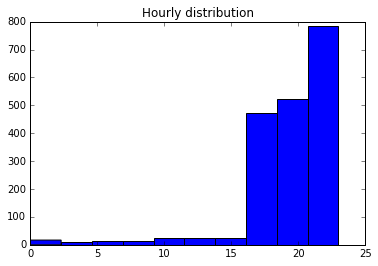

In [69]:
# To plot data..
from matplotlib import pyplot as plt
# and set the interactive mode
plt.ion()

# Plotting an histogram...
frequency, slots, _ = hist(hours)
plt.title("Hourly distribution")

In [70]:
# .. returns a
from collections import OrderedDict
distribution = OrderedDict(zip(slots,
    frequency))

In [71]:
# Print it nicely with
import json
print(json.dumps(distribution, indent=1))

{
 "0.0": 17.0, 
 "2.2999999999999998": 11.0, 
 "4.5999999999999996": 12.0, 
 "6.8999999999999995": 15.0, 
 "9.1999999999999993": 26.0, 
 "11.5": 26.0, 
 "13.799999999999999": 24.0, 
 "16.099999999999998": 473.0, 
 "18.399999999999999": 521.0, 
 "20.699999999999999": 786.0
}


## Size distribution: Exercise

  - Create a size $\delta$ from the previous maillog using hist(..., bins=...)
  - Hint: help(hist)
        
```
    size_d = {  # mail size between
    0: xxx  #  0 - 10k
    1: xxx  #  10k - 20k
    ..
    }
```

  - Homework: Use the size $\delta$ to find size\_mean and size\_sigma and compare with $\sigma$ and mean evaluated from the original data-series
    


In [ ]:
#
# Exercise frame
#

# Simulating data with $\sigma$ and $\bar{x}$

  - Mean and a stdev are useful starting point to simulate data using the gaussian distribution.


In [72]:
# Get the sigma_size from maillog
solution = b'CnJldCA9ICFncmVwIHNpemUgZGF0YS9tYWlsbG9nCnNpemVzID0gW2ludCh4WzU6LTFdKSBmb3Ig\neCBpbiByZXQuZmllbGRzKDcpXQoK\n'
from course import show_solution
# show_solution(solution)
def maillog_size():
    ret = !grep size ../data/maillog
    sizes = [int(x[5:-1]) for x in ret.fields(7)]
    return sizes

sizes = maillog_size()

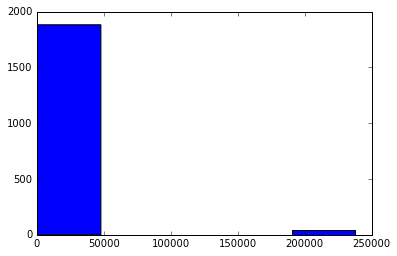

In [80]:
frequency, slots, _ = plt.hist(sizes, bins=5)

In [83]:
# We can use our time_d to simulate the load during the day
from time import localtime
hour = localtime().tm_hour
mail_per_minute = time_d[hour] / 60 # minutes in hour
print("Estimated frequency is", mail_per_minute)

Estimated frequency is 0.183333333333


In [30]:
# And sizes to create a mail load generator
mean_size, sigma_size = mean(sizes), std(sizes)
print(mean_size, sigma_size)

11810.7814123 34065.1257772


In [31]:
# A mail load generator creating attachments of a given size...
from random import gauss
def mail_size_g():
    mu = min(sizes)
    x = gauss(mean_size, sigma_size) # a random number
    # as gaussian can give negative numbers
    # we should ceil up (or skip) negative values
    return x if x > mu else mu

In [32]:
# How is our estimation far from reality?
for emails in 5000, 10000, 100000:
    X = [mail_size_g() for x in xrange(emails)]
    print(emails, mean(X) / mean_size, std(X) / sigma_size)

# Homework: write a script to simulate the load of your mailserver and tweak your mail_size_g
# Hint: create a set of attachment files: 1k.out, 10k.out, 100k.out, 1000k.out, 5000k.out
# Hint: use mail_size_g() to select one of those files instead of creating a given email

5000 1.71034092398 0.689055619899
10000 1.75139190831 0.699085040974
100000 1.73892008759 0.693283236383


To better simulate mail size, consider using  a Cauchy distribution.

See www.ieee802.org/16/tgm/contrib/C80216m-07_122.pdf

# Linear Correlation


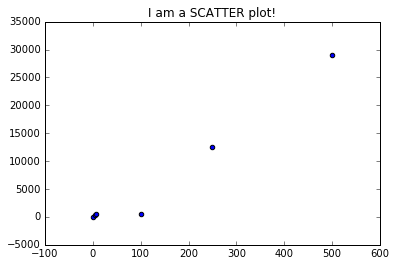

In [33]:
# Let's plot the following datasets
#  taken from a 4-hour distribution
mail_sent = [1, 5, 500, 250, 100, 7]
kB_s = [70, 300, 29000, 12500, 450, 500]

# A scatter plot can suggest relations
#  between data
plt.scatter(mail_sent, kB_s)
plt.title("I am a SCATTER plot!")

# Linear Correlation

The Pearson Coefficient $\rho$ is a relation indicator.

-  no relation
-  direct relation (both dataset increase together)
-  inverse relation (one increase as the other decrease)

\begin{equation}
\rho(X,Y) = \frac{
    \sum (x-\bar{x})(y-\bar{y})
    }{
    \sqrt{\sum (x - \bar{x})^{2}}\sqrt{\sum (y - \bar{y})^{2}}
}
\end{equation}


In [34]:
from scipy.stats.stats import pearsonr
ret = pearsonr(mail_sent, kB_s)
print(ret)
#>(0.9823, 0.0004)
correlation, probability = ret

(0.98257763778173501, 0.00045266387726145078)


# You must (scatter) plot!

## $\rho$ does not detect non-linear correlation
<img src="http://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/506px-Correlation_examples2.svg.png" />

# Combinations

*a way of selecting members from a grouping, such that 
the order of selection does not matter*

 ## Combinations vs Permutations
 -  expressed by the binomial coefficient $\binom{n}{k}$
 -  different from Permutations where order matters (expressed by factorial $n!$)
 -  Permutations are more than Combinations - as the "Per" prefix says :D
 
 
 ## Combining 4 suites, 2 at a time
 
  1. ('♠', '♡')
  2. ('♠', '♢')
  3. ('♠', '♣')
  4. ('♡', '♢')
  5. ('♡', '♣')
  6. ('♢', '♣')


In [111]:
# Given a table with many data series
from course import table
#table = {...
#  'cpu_usr': [10, 23, 55, ..],
#  'byte_in': [2132, 3212, 3942, ..], 
# }
print(*table.keys(),sep='\n')

# We can combine all their names with
from itertools import combinations
list(combinations(table,2))[:10]

swap_out
cpu_usr
byte_out
cpu_wait
swap_in
byte_in
irq
cache
cpu_id
cpu_sys
csw
buff


[(u'swap_out', u'cpu_usr'),
 (u'swap_out', u'byte_out'),
 (u'swap_out', u'cpu_wait'),
 (u'swap_out', u'swap_in'),
 (u'swap_out', u'byte_in'),
 (u'swap_out', u'irq'),
 (u'swap_out', u'cache'),
 (u'swap_out', u'cpu_id'),
 (u'swap_out', u'cpu_sys'),
 (u'swap_out', u'csw')]

# Netfishing correlation

When looking for interesting data, we can calculate correlation between every combination of data series and concentrate on those over a given threshold 

In [122]:

# We can try every combination between data series 
# and check if there's some correlation
from itertools import combinations
from scipy.stats.stats import pearsonr
from course import table

for k1, k2 in combinations(table, 2):
    r_coeff, probability = pearsonr(table[k1], table[k2])
    
    # I'm *still* not interested in data under this threshold
    if r_coeff < 0.6:
        continue
        
    print("linear correlation between {:8} and {:8} is {:3}".format(
        k1, k2, r_coeff))

linear correlation between cpu_wait and byte_in  is 0.68140970936
linear correlation between cpu_wait and irq      is 0.694233857902
linear correlation between cpu_wait and buff     is 0.795312316383
linear correlation between byte_in  and irq      is 0.867031877805
linear correlation between byte_in  and csw      is 0.832882152364
linear correlation between irq      and csw      is 0.858848359799


## Plotting correlation

Coloring scatter-plot gives us one more dimension in a 2d plot: time!

We have to mark our ordered data-series with a tick-series. eg.


|tick| 0 | 0 | 0 | 1 | 1 | .. |
|---|---|---|---|--|--|--| --|
|cpu_usr| 10 | 23| 55| 33 | 10 | .. |
|byte_in| 2132 | 3212| 3942 |  321 | 42| ..| 

Elements with the same tick are in the same bucket. 

We will now group our series in 3 buckets of 8-hours. We'll use the ```itertools.chain``` function which
flattens a list of iterators.


In [151]:
from itertools import chain  #  magic function to flatten a list of iterators

# Dividing samples in 3 buckets.
BUCKETS = ["morning", "afternoon", "night"]
samples = len(table['byte_in'])

# scale samples on 24 hours
ticks = list(chain(*(
            [x] * (samples // len(BUCKETS))    # generates a [ 0 ] * bucket_size list.
            for x in range(0, 24, 24 // len(BUCKETS))  # rescale all samples on 24 hours
        ))
     )
print(ticks)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16]


In [152]:
# Any doubts? Just check the ticks distribution ;)
print(Counter(ticks))

# Exercise: use json.dumps to prettify the distribution.

Counter({0: 23, 8: 23, 16: 23})


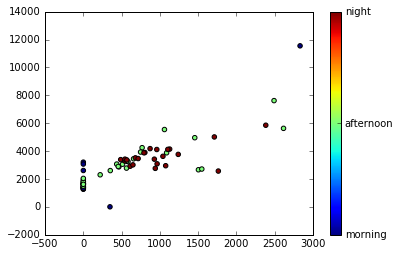

In [153]:
# Create a formatter associating a label to every color point:
#   - we just take into account the tick value, ignoring other values
#   - the tick is divided by 8 (the bucket_size) to implement the following mapping
#      - [0, 8)   -> morning
#      - [8, 16)  -> afternoon 
#      - [16, 24) -> night
formatter = plt.FuncFormatter(lambda tick, *ignored_args: BUCKETS[tick//8])

plt.scatter(table['byte_in'], table['csw'], c=ticks)
plt.colorbar(ticks = range(0, 28, 8), format=formatter)

In [154]:
from scipy import arange
set(map(int, arange(0, 3, 1/samples)))

{0, 1, 2}

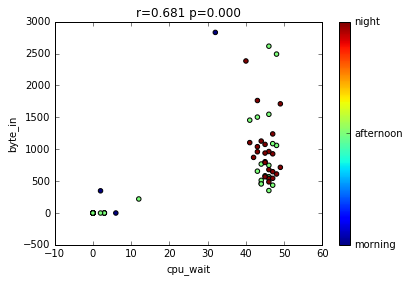

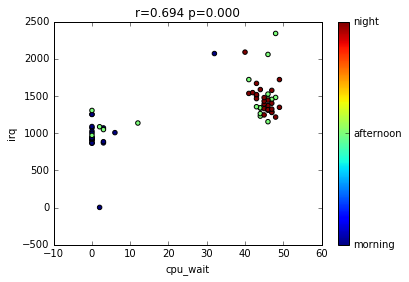

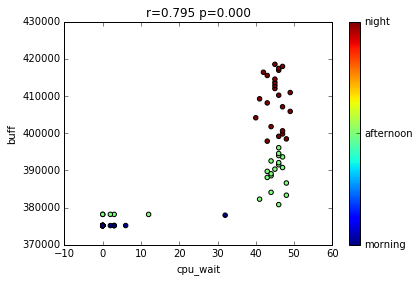

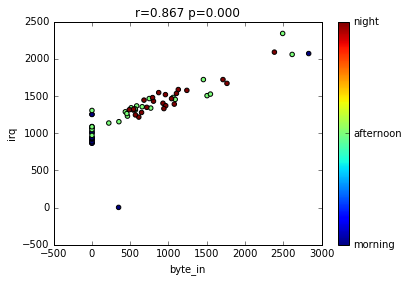

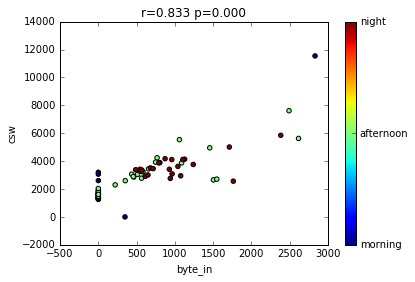

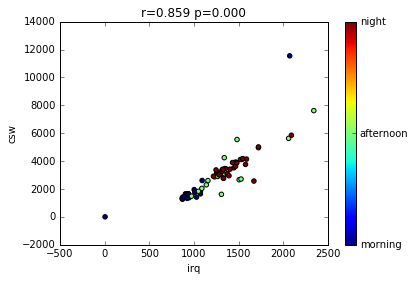

In [156]:
#netfishing_correlation_plot():
# Consider using pandas.tools.plotting import scatter_matrix
from itertools import combinations
from scipy.stats.stats import pearsonr
from course import table
from matplotlib import pyplot as plt

for (k1, v1), (k2,v2)  in combinations(table.items(), 2):
    r_coeff, probability = pearsonr(table[k1], table[k2])
    if r_coeff < 0.6:
        continue
    plt.scatter(v1, v2, c=ticks)
    plt.xlabel(k1); plt.ylabel(k2)
    plt.title("r={:0.3f} p={:0.3f}".format(r_coeff, probability))
    plt.colorbar(ticks = range(0, 28, 8), format=formatter)
    plt.show()
    # Uncomment the following lines to save the plot on disk
    # plt.savefig("colorbar_{}_{}.png".format(k1, k2))
    # plt.close()

## Exercise solutions

In [44]:
from __future__ import print_function, unicode_literals
def ping_rtt(seconds=10):
    """
       goal: slicing data
       goal: using zip to transpose data
    """
    import sys
    from course import sh
    cmd = "ping -c{seconds} www.google.it"
    if 'win' in sys.platform:
        cmd = "ping -n{seconds} www.google.it"

    ping_output = sh(cmd.format(seconds=seconds))
    # Filter out uninteresting lines
    ping_output = [x.replace(b"=", b" ") for x in ping_output if b'from' in x]
    if 'win' in sys.platform:
        ping_output = [x.split()[6::2] for x in ping_output]
    else:
        ping_output = [x.split()[-4:-1:2] for x in ping_output]
    ttl, rtt = zip(*ping_output)
    return map(float, rtt)

print(*ping_rtt(3))

14.552 14.617 14.316


In [45]:
# Exercise II solution
# deliveder emails are like the following
#May 14 16:00:04 rpolli postfix/qmgr[122]: 4DC3DA: removed"

ret = !grep removed maillog # get the interesting lines

ts = ret.fields(2) # find the timestamp (3rd column)

hours = [ int(ts)  for x in ts ]
time_d = {x: hours.count(x) for x in set(hours)}

TypeError: int() argument must be a string or a number, not 'SList'